In [133]:
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
import numpy as np

data = pd.read_csv('train.csv')

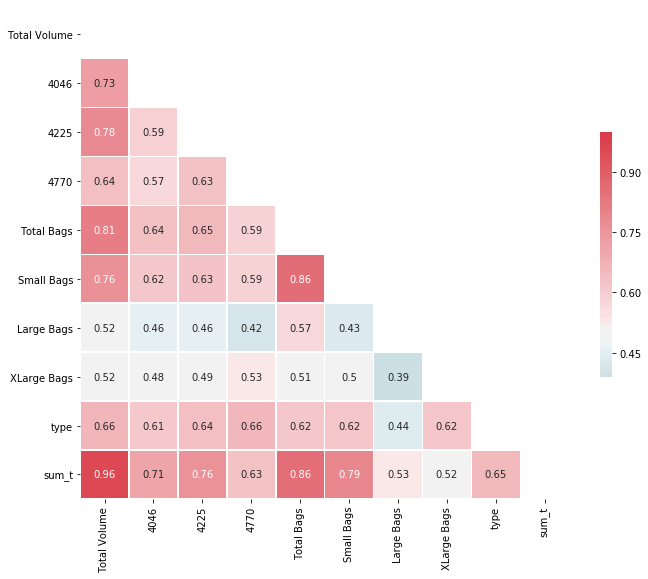

In [134]:
corr = x_train.corr(method="kendall")

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0.5,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True)

plt.show()

In [135]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score

def performance_metrics(y_true,y_pred):
    rmse = mean_absolute_error(y_true,y_pred)
    r2 = r2_score(y_true,y_pred)
    explained_var_score = explained_variance_score(y_true,y_pred)
    
    return rmse,r2,explained_var_score

In [136]:
from sklearn.preprocessing import RobustScaler
m = RobustScaler()
df =data
m.fit_transform(df)
y_train = data['AveragePrice']
x_train = data.drop(['AveragePrice','year','id'], axis=1)

test = pd.read_csv('test.csv')
x_test = test.drop(['year','id'], axis = 1)
def sum(v,b):
    x = v + b
    return x

x_train['sum_t'] = x_train[['Total Volume','Total Bags']].apply(lambda x: avg(x['Total Volume'], x['Total Bags']), axis=1)
x_test['sum_t'] = x_test[['Total Volume','Total Bags']].apply(lambda x: avg(x['Total Volume'], x['Total Bags']), axis=1)

In [ ]:
x_train.shape
split = int(0.75*x_train.shape[0])
tr_X = x_train[:split]
tr_Y = y_train[:split]
te_x = x_train[split:]
te_Y = y_train[split:]

In [127]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=200)  
regressor.fit(x_train, y_train)  
y_pred = regressor.predict(x_test)  

In [ ]:
rmse,r2,explained_var_score = performance_metrics(te_Y,y_pred)

print("Root mean squared error:{} \nR2-score:{} \nExplained variance score:{}".format(rmse,r2,explained_var_score))

In [141]:
df_soln = pd.DataFrame(data = [test['id'], optimized_predictions], index = None)
df = df_soln.transpose()
df['id'] = df['id'].astype(int)
df.columns = ['id','AveragePrice']
df.to_csv('soln8.csv',index = False)

In [1]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.ensemble import GradientBoostingRegressor

clf = GradientBoostingRegressor(n_estimators = 200,max_depth=5)        #Initialize the classifier object

parameters = {'loss':['ls', 'lad', 'huber', 'quantile'],'learning_rate':[0.01,0.05,0.1,0.5,1]}    #Dictionary of parameters

scorer = make_scorer(r2_score)         #Initialize the scorer using make_scorer

grid_obj = GridSearchCV(clf,parameters,scoring=scorer)         #Initialize a GridSearchCV object with above parameters,scorer and classifier

grid_fit = grid_obj.fit(x_train,y_train)        #Fit the gridsearch object with X_train,y_train

best_clf = grid_fit.best_estimator_         #Get the best estimator. For this, check documentation of GridSearchCV object

unoptimized_predictions = (clf.fit(tr_X, tr_Y)).predict(te_x)      #Using the unoptimized classifiers, generate predictions
optimized_predictions = best_clf.predict(x_test)        #Same, but use the best estimator

acc_unop = r2_score(te_Y, unoptimized_predictions)*100       #Calculate accuracy for unoptimized model
acc_op = r2_score(te_Y, optimized_predictions)*100         #Calculate accuracy for optimized model

print("Accuracy score on unoptimized model:{}".format(acc_unop))
print("Accuracy score on optimized model:{}".format(acc_op))


NameError: name 'r2_score' is not defined